In [1]:
import cv2
import numpy as np
import cv2
import numpy as np

def graph_cut_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    mask = np.zeros_like(gray)

    rect = (20, 20, image.shape[1]-20, image.shape[0]-20)

    bgd_model = np.zeros((1,65),np.float64)
    fgd_model = np.zeros((1,65),np.float64)

    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    background_mask = 1 - mask2

    foreground = image * mask2[:, :, np.newaxis]
    background = image * background_mask[:, :, np.newaxis]

    return foreground, background

image = cv2.imread('input_image.webp')

foreground, background = graph_cut_segmentation(image)

cv2.imwrite('Original_Image.webp', image)
cv2.imwrite('Foreground_Image.webp', foreground)
cv2.imwrite('Background_Image.webp', background)
cv2.waitKey(0)
cv2.destroyAllWindows()



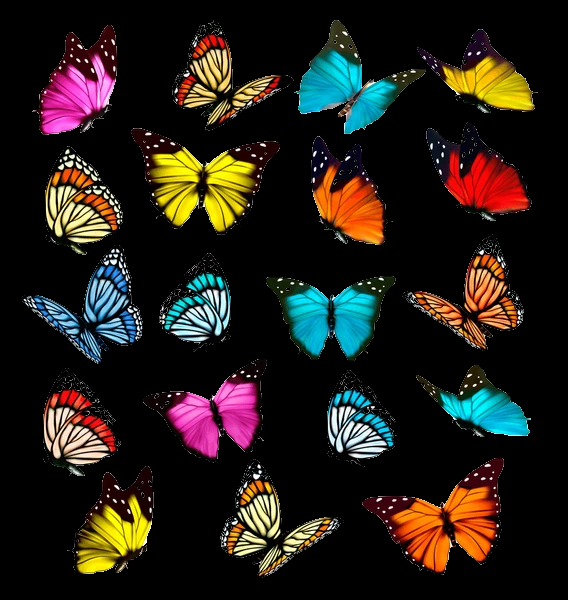

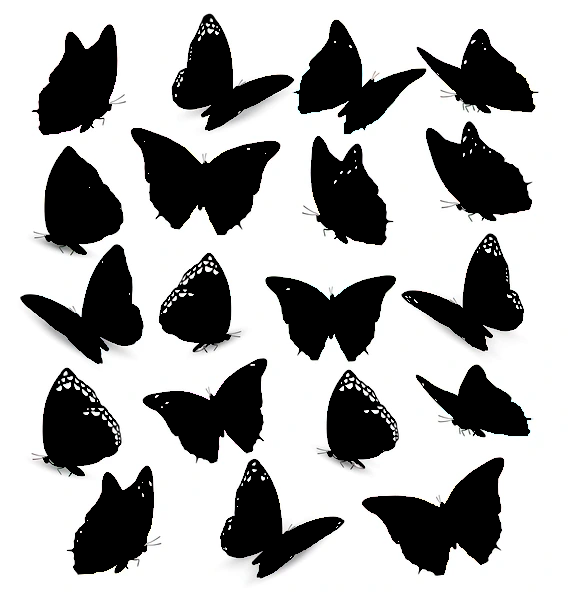

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow( foreground)
cv2_imshow( background)